In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\HIM\Desktop\golu\Dataset.csv")

### I have to create my original dataset again as it is creating problem if I load it from saved file.

In [10]:
data = data.drop(["business_id","smoking","BusinessParking"],axis=1)


In [11]:
drop = list()
for c in data.drop(["pricelevel","review_count","stars","average_hours"],axis=1).columns:
    if data[c].value_counts()[1] < 15:
        drop.append(c)

d = {
    "Amenties": "",
    "Food":""
}
new  = pd.DataFrame(d,index=range(len(data)))

food = ['Salvadoran', 'Arabian', 'Argentine', 'Belgian','Teppanyaki', 'Dim Sum', 'French', 'Filipino', 'Canadian','Ice Cream','Italian',
 'Mediterranean', 'Moroccan', 'Desserts', 'Nepalese','Polish', 'Tex-Mex','Caribbean','Hawaiian','Thai','European','Cuban','Soups','Cantonese',
 'Burgers', 'Steakhouse', 'African', 'Kebab', 'Greek', 'Asian Fusion', 'Ethiopian', 'Turkish', 'Middle Eastern', 'Lounge', 'Indian',
 'Latin American', 'Brazilian','Korean', 'Barbeque', 'Russian', 'Afghan', 'Malaysian', 'Kosher', 'American', 'Irish', 'Chinese',
 'German', 'Taiwanese', 'Persian', 'Mongolian', 'Vietnamese', 'Donuts', 'Scottish', 'Waffles', 'Fast Food', 'Venezuelan', 'Pizza', 'Deli', 'Lebanese',
 'Diner', 'Seafood', 'British', 'Portuguese', 'Columbian', 'Mexican', 'Peruvian', 'Japanese', 'Cambodian', 'Hot Dogs','Spanish']

Amenties = list()
for i  in data.drop(drop,axis=1).columns:
    if i not in food:
        if data[i].nunique()<3: ##Only to get Categorial Variables
            Amenties.append(i)

for i in food:
    new["Food"] = data[i].astype('int64').astype(str) + new["Food"] ## Firstly  it is converted to int bcs our values is in format
                                                                    ##0.0 which cannot be converted into binary.
for i in Amenties:
    new["Amenties"] = data[i].astype('int64').astype(str) + new["Amenties"]
    
for i in range(len(new)):
    new["Amenties"][i] =int(new["Amenties"][i],2)
    new["Food"][i] = int(new["Food"][i],2)

In [12]:
new

Amenties                   Food
0       7692943360                 524288
1       1881473536                   8704
2       1610940424                   8704
3       5545459712       1125900443713536
4       1921843200   18464758472219033600
5       1082130432      18014398509481984
6          8454144      18014398509481984
7       1344602624       2251799813685248
8       9675014144      18014398509481984
9       1074069504                      0
10      1073807360     146366987889541120
11       973406212                      0
12     12224626688      18014398526259200
13      5556207620          8796093022208
14     10344005632   18464758472219033600
15      1610940416                      0
16      1078263816                      0
17      8202289152    1315051095487152128
18      1074070024                   8192
19      5514264576     144123984168910976
20       134283264       1125899906842624
21      5541265408         35184372088832
22      1610940424                      0
23      1357185024     162129586585337856
24      1384972288   18464758472219033600
25      7829520384   18446744073709551616
26      1086652416      72057598332895232
27      1350828032      18014398510006272
28      1086324736      18014398509481984
29      1351417856   18446744073709551616
...            ...                    ...
44685   5502992384   73786976294838206464
44686   5547032576       1161084278931456
44687   8567193600         70368744177664
44688   1623523328     144115188075855872
44689   5804982272                      0
44690   1082195968   18590859261785407488
44691   1082917376   18446744073709551616
44692   1921843200   18446744073709551616
44693   5914755072     576460752303423488
44694   1357185032          8796093022208
44695   1881473536                      0
44696   6093078532     576460760893358080
44697   8234270720                 524288
44698   7558201344      72057594037927936
44699       327680                      0
44700    268435456                   1024
44701   1610940416                      0
44702   1610874888                   8192
44703   8235843584              536871040
44704   1086652416             4294969344
44705   9940566016      18014398509482496
44706   8509001732                      0
44707   5515575296      72057594037928960
44708   1489240064     216172782382222336
44709   7693206528   73787011479210819584
44710   7952728064  590295810358705651712
44711   9940828160      18023194602504192
44712   6350176256      18093563346682368
44713   1619525632      74309393851613184
44714   7978418180          8796093022208

[44715 rows x 2 columns]

### Other numerical features include "Average_hours" , "Price" , "stars". We will add them separetly with  our data and in end will add all these together.

In [13]:
new["average"] = data.average_hours

### For evaluation ill be using silhouette score and hartigans index. I'll take sample due to limitation of resource.

In [15]:
sample  =new.sample(frac=.30,random_state=2)

In [16]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
def silhoute(sample , n):
    range_n_clusters = n
    X =sample.values

    for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 9)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
            ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
        centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

        plt.show()

In [17]:
from sklearn.cluster import KMeans
from numpy import *

def hartigan_K(list_of_tuples, threshold = 12):
    # 'list_of_tuples' is a list containing the points you want to cluster
    # 'threshold' optimizes goodness of fit values
    #     Hartigan recommends setting threshold to 10, but Chiang & Mirkin confirm up to 12
    # returns integer, "correct" number of clusters
    
    inertia_list = zeros(len(list_of_tuples)+1) # initializes for maximum possible clusters
    num = 0                                     # counter
    H_Rule = threshold+1                        # simply initializes above threshold to meet 'while' condition
    
    # NOTE: 'inertia' is equivalent to the sum of within-cluster distances to centroids
    
    while num < len(list_of_tuples) and H_Rule > threshold:
        kmn = KMeans(n_clusters = num+1)
        kmn.fit(list_of_tuples)
        inertia_list[num+1]+=kmn.inertia_
        if num > 0:
            H_Rule = ((float(inertia_list[num])/inertia_list[num+1])-1)*(len(list_of_tuples)-(num)-1)
        num+=1
    
    if H_Rule > threshold:
      num+=1
    # NOTE: if while-loop reaches the number of K-Means clusters equal to the length of list_of_tuples
    # without hitting the threshold, then function returns trivial solution that there are N clusters
    # (where N is the number of points under observation)
    
    return num-1


For n_clusters = 6 The average silhouette_score is : 0.987150459835


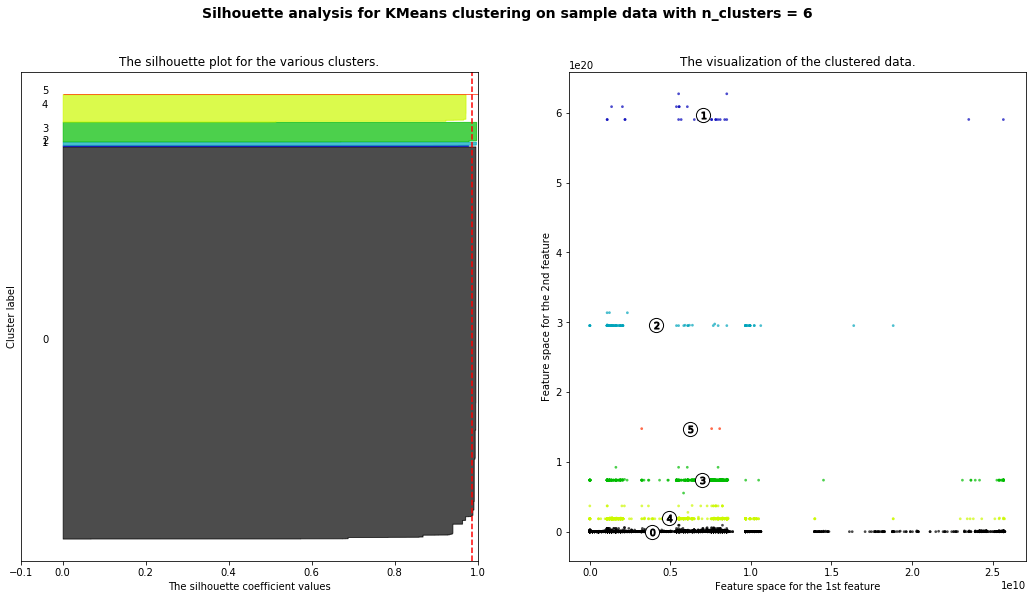

For n_clusters = 7 The average silhouette_score is : 0.988929659874


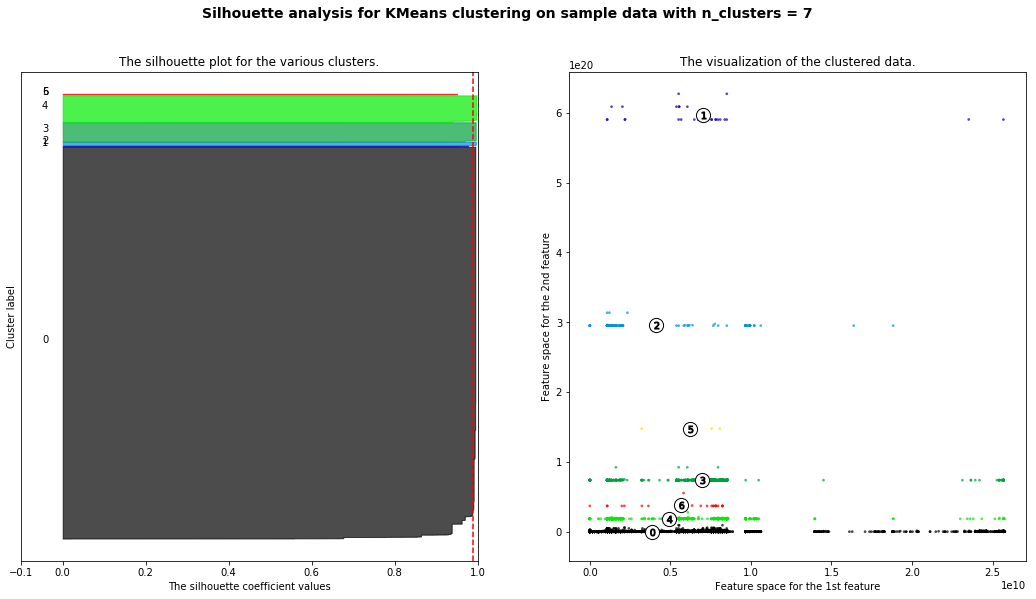

For n_clusters = 8 The average silhouette_score is : 0.988806012727


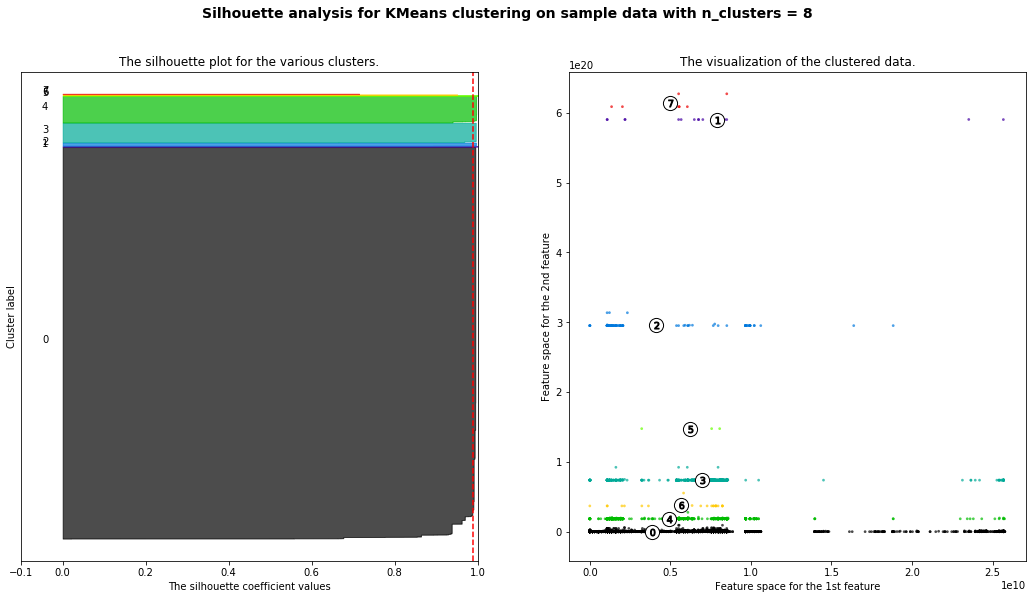

For n_clusters = 9 The average silhouette_score is : 0.988933062972


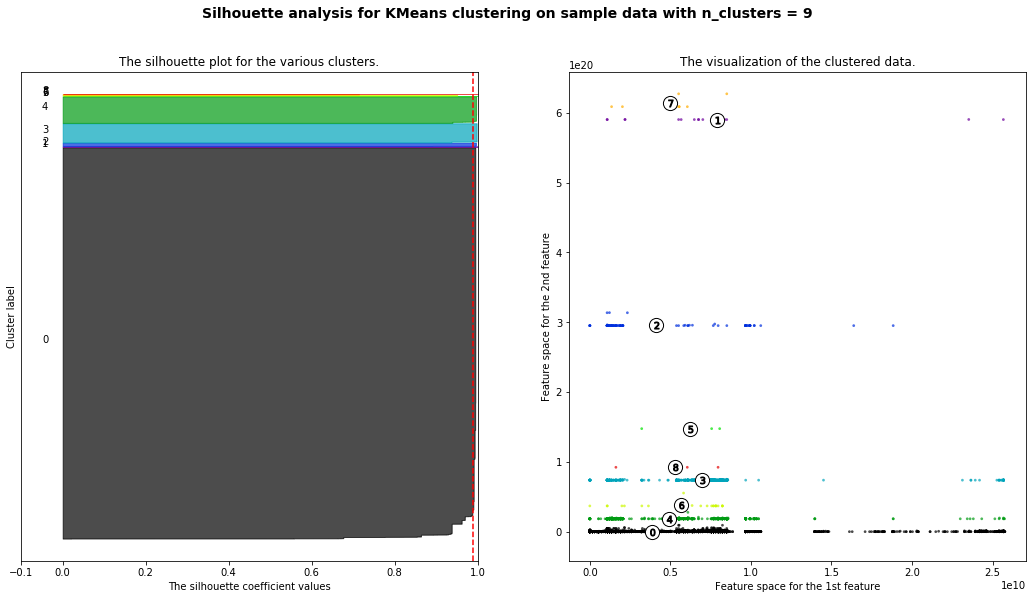

For n_clusters = 10 The average silhouette_score is : 0.956631093852


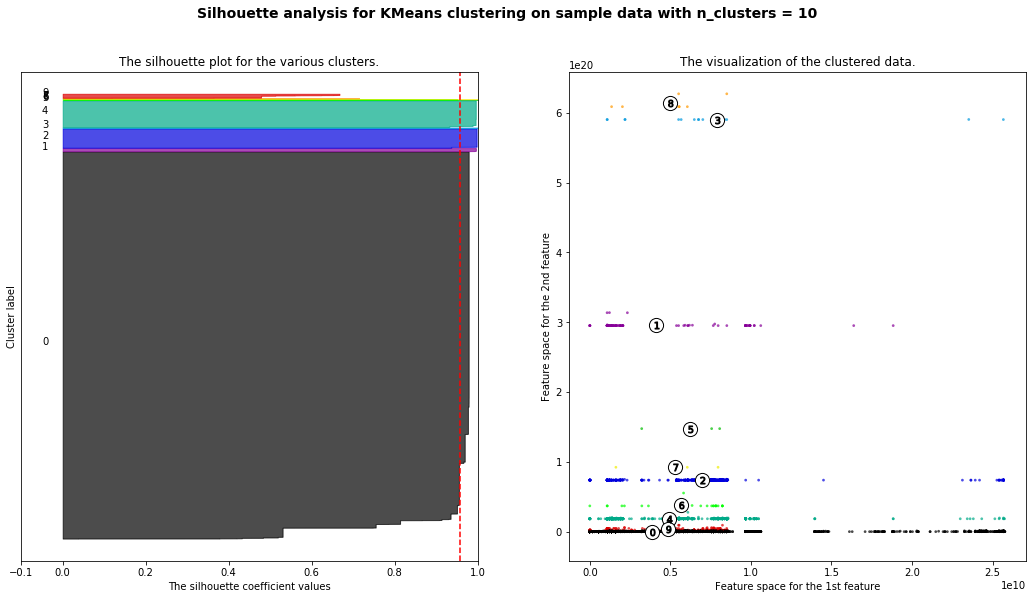

In [18]:
silhoute(sample,[6,7,8,9,10])

In [19]:
hartigan_K(sample)

197

F:\ANACONDA\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


For n_clusters = 197 The average silhouette_score is : nan


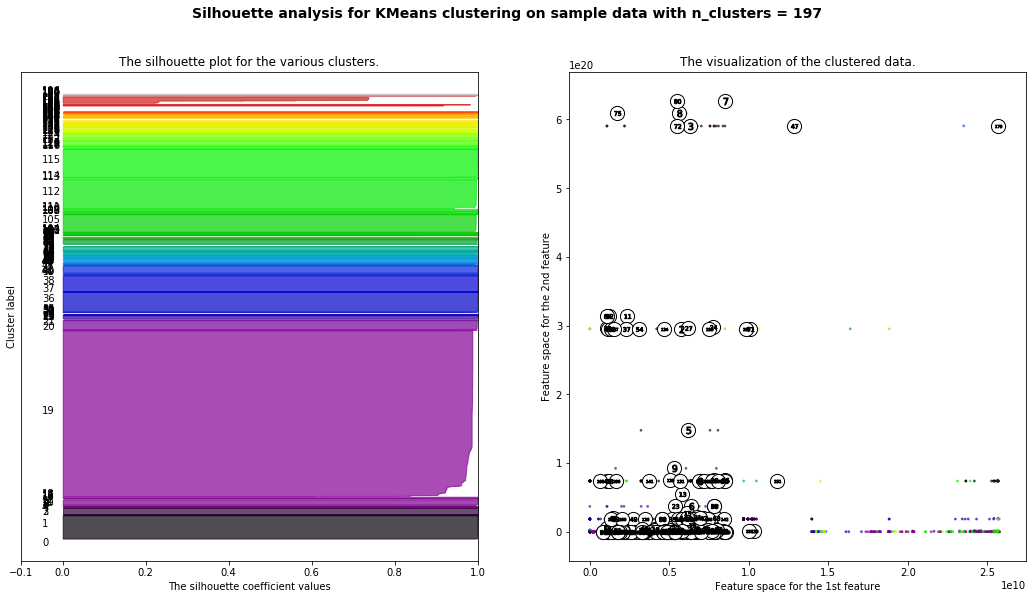

In [20]:
silhoute(sample,[197])

### lets plot k=9 

In [36]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
def plot(x,y,z,color):
    trace1 = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
        size=10,
        color=color,     # set color to an array/list of desired values
        colorscale=[[0, 'rgb(166,2,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']],   # choose a colorscale
        opacity=0.8
    )
    )

    data = [trace1]
    layout = go.Layout(
         width=1000,
        height=800,
        margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
        )
        )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='3d-scatter-colorscale')

In [27]:
from sklearn.cluster import KMeans
def kme(sample,n):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(sample)
    return kmeans.labels_

In [37]:
kme(sample,9)
plot(sample.Amenties,sample.Food,sample.average,label)

### now lets add price in place of averag hours

In [38]:
new = new.drop(["average"],axis=1)
new["price"] = data.pricelevel

In [41]:
sample  =new.sample(frac=.30,random_state=2)

For n_clusters = 5 The average silhouette_score is : 0.98662779971


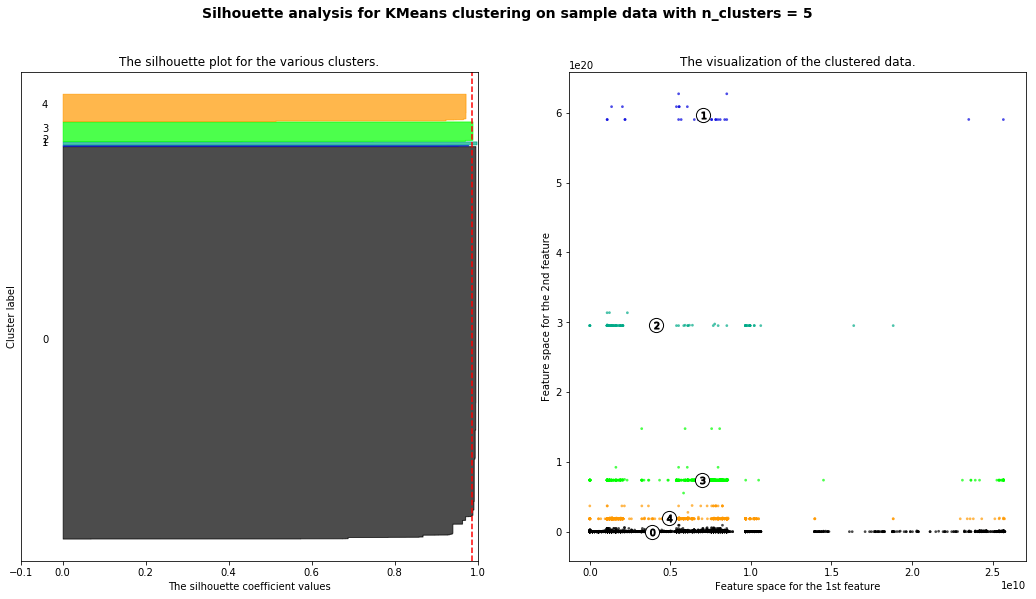

For n_clusters = 6 The average silhouette_score is : 0.987150459835


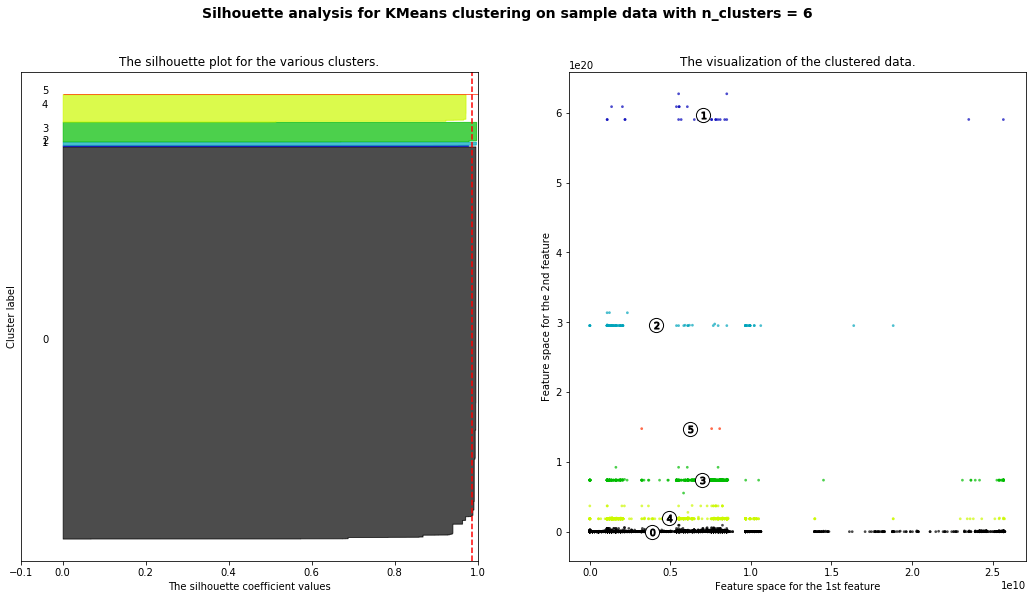

For n_clusters = 7 The average silhouette_score is : 0.988929659874


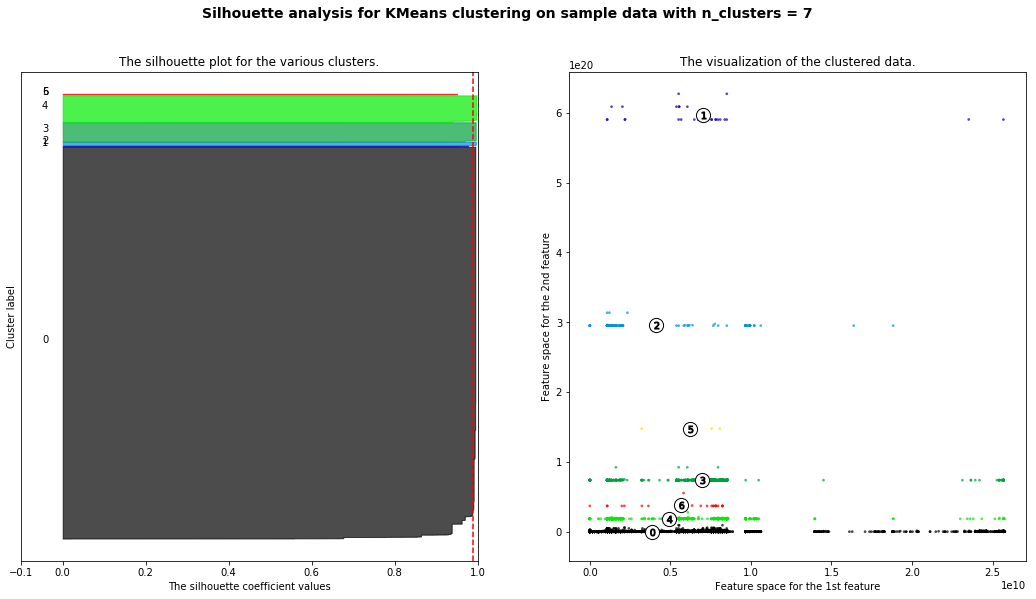

For n_clusters = 8 The average silhouette_score is : 0.988806012727


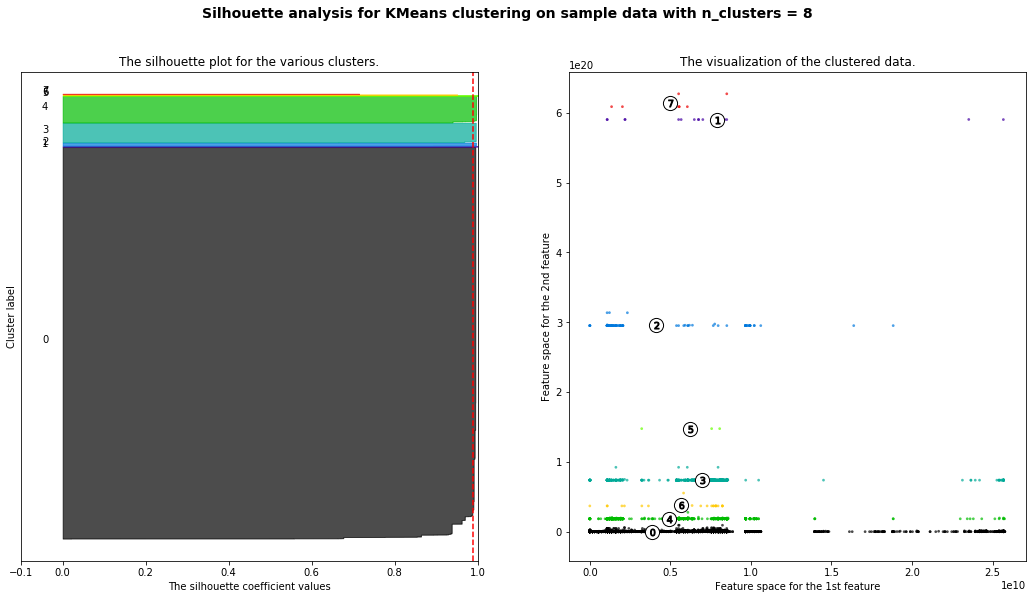

For n_clusters = 9 The average silhouette_score is : 0.988933062972


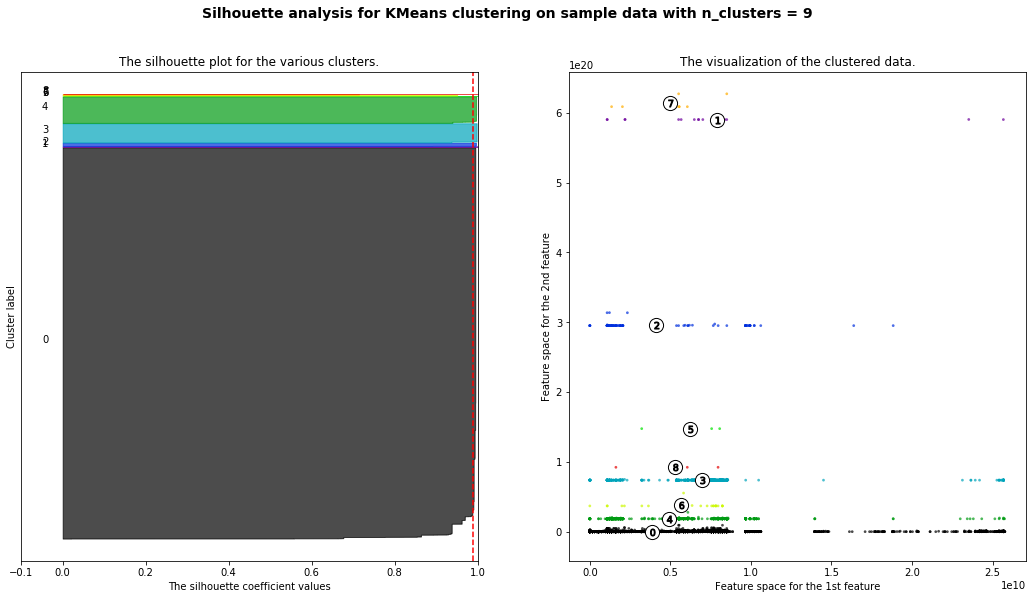

For n_clusters = 10 The average silhouette_score is : 0.956631093852


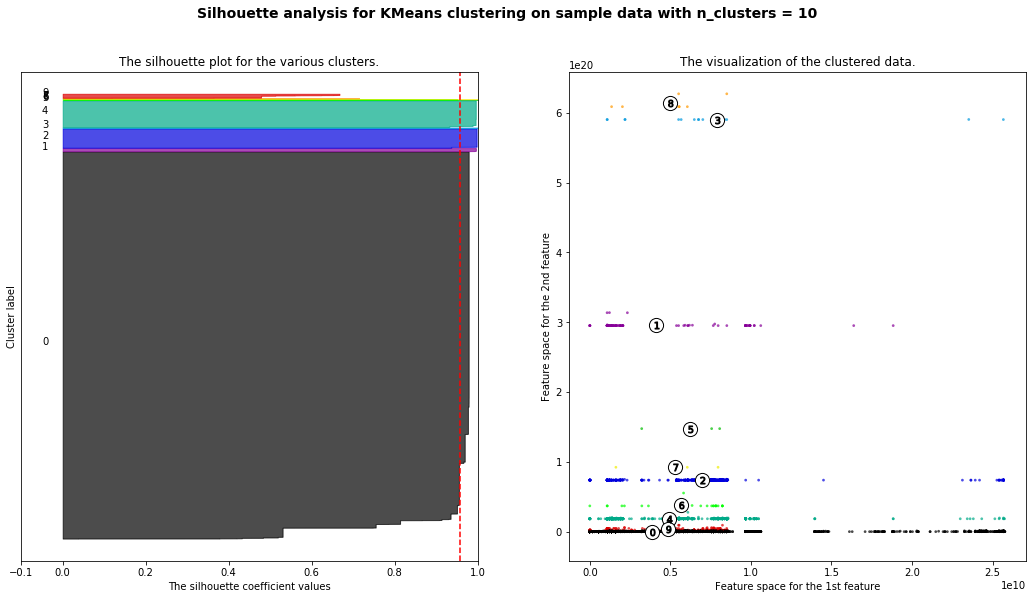

In [42]:
silhoute(sample=sample,n=[5,6,7,8,9,10])

In [43]:
hartigan_K(sample)

198

In [44]:
kme(sample,9)
plot(sample.Amenties,sample.Food,sample.price,label)

### Its time to add stars

In [45]:
new= new.drop(["price"],axis=1)
new["stars"] = data.stars

In [46]:
sample= new.sample(frac=.30,random_state=2)

For n_clusters = 5 The average silhouette_score is : 0.98662779971


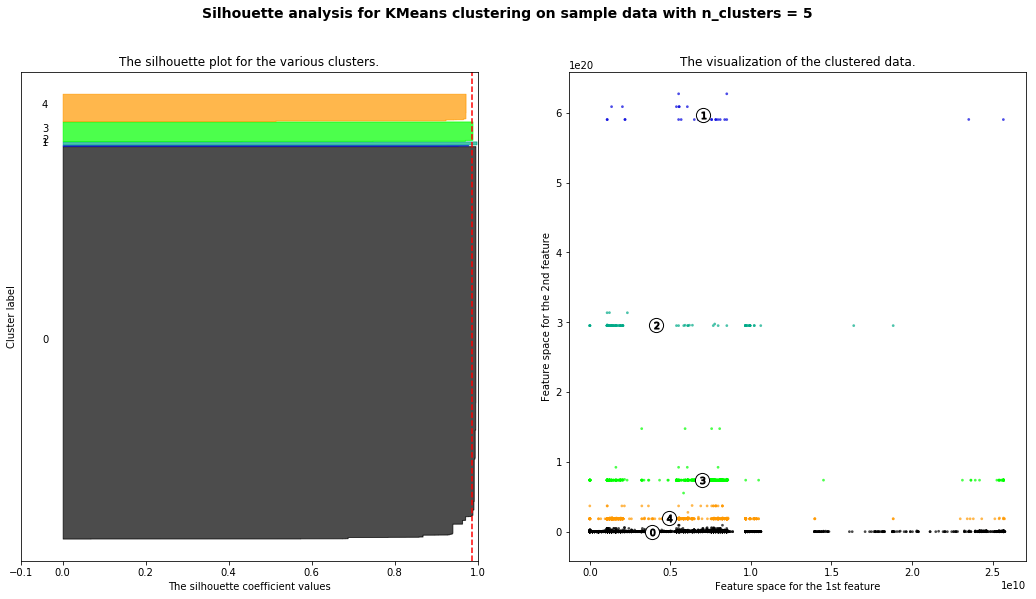

For n_clusters = 6 The average silhouette_score is : 0.987150459835


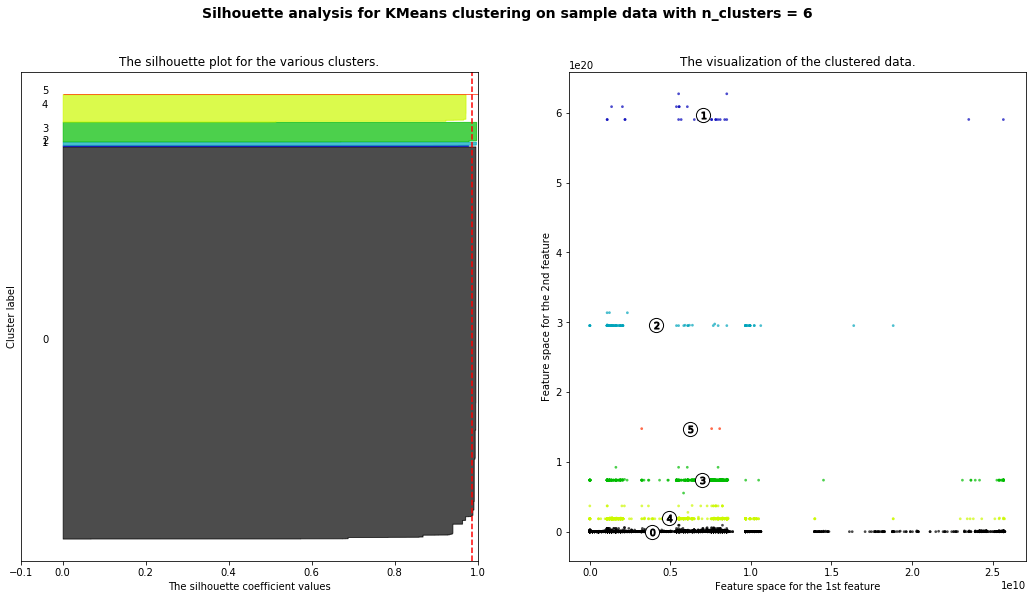

For n_clusters = 7 The average silhouette_score is : 0.988929659874


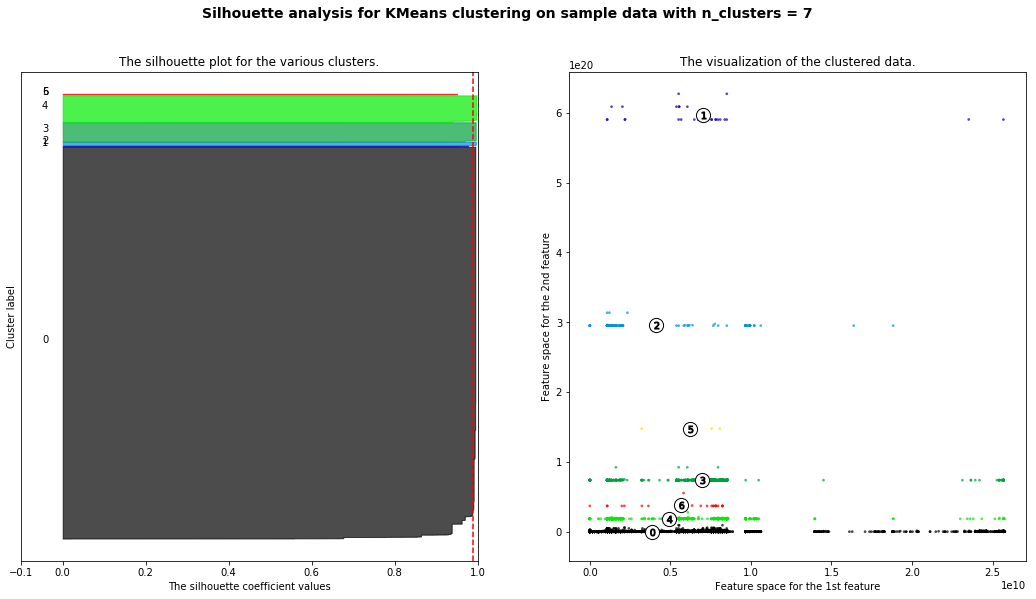

For n_clusters = 8 The average silhouette_score is : 0.988806012727


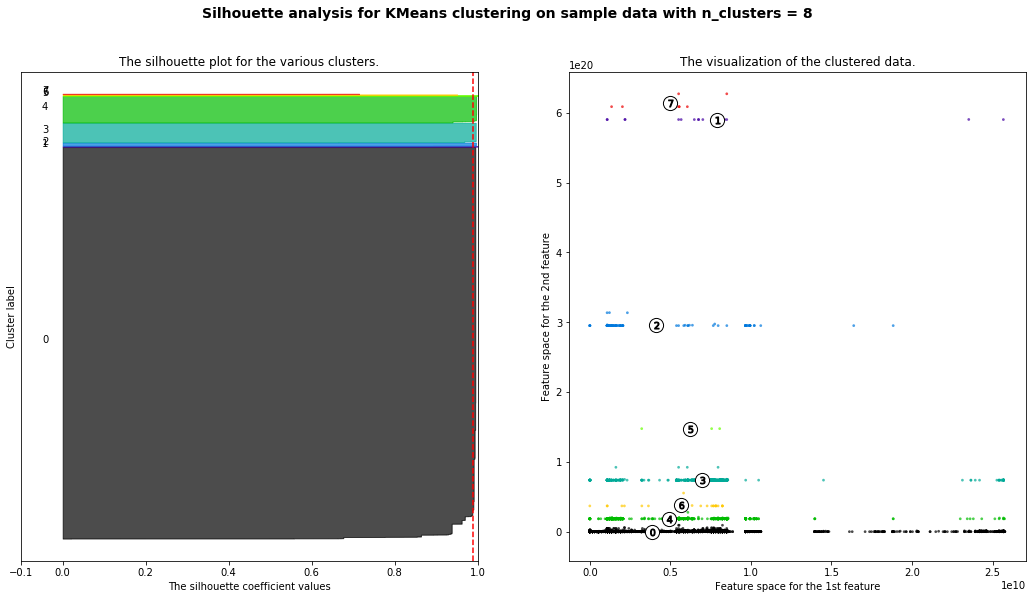

For n_clusters = 9 The average silhouette_score is : 0.988933062972


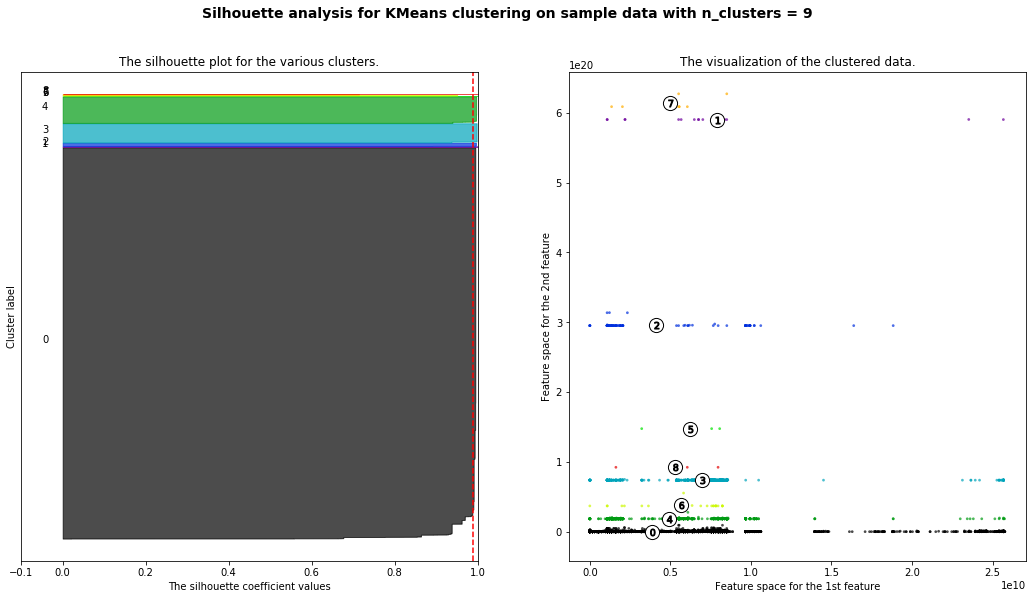

For n_clusters = 10 The average silhouette_score is : 0.956631093852


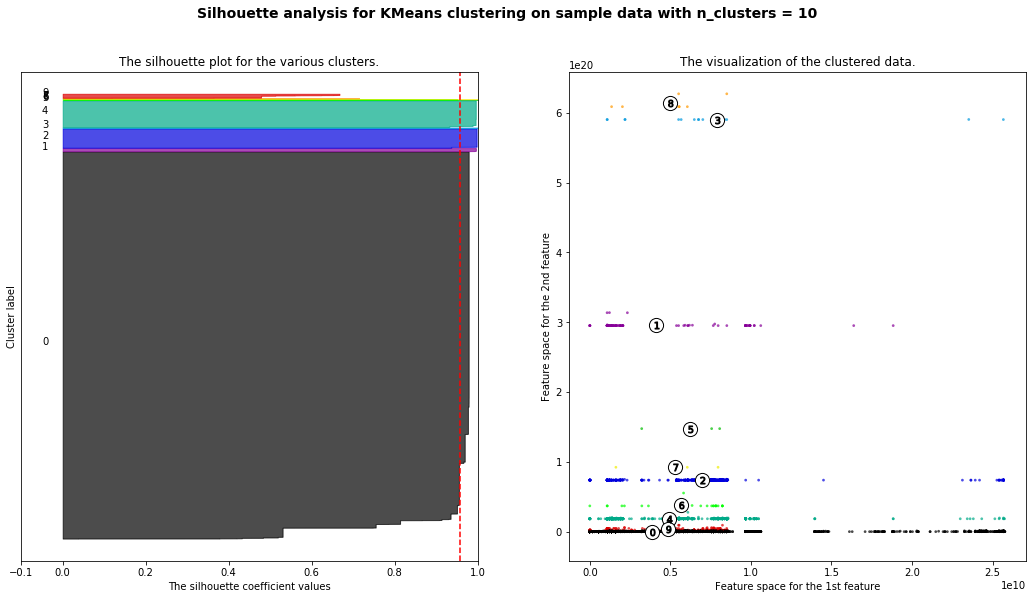

In [47]:
silhoute(sample,[5,6,7,8,9,10])

In [48]:
hartigan_K(sample)

151

For n_clusters = 151 The average silhouette_score is : 0.991948804937


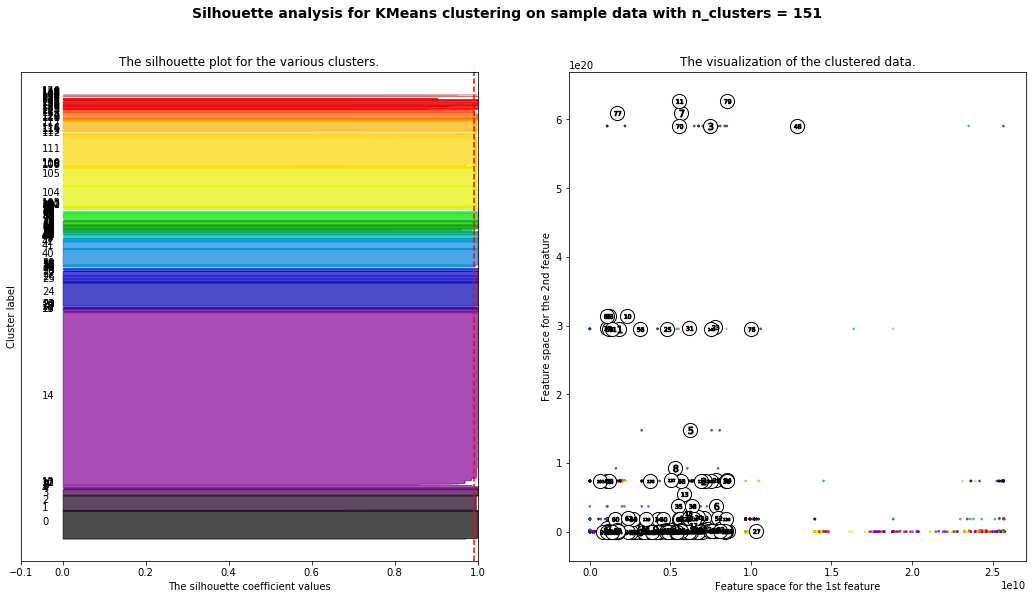

In [49]:
silhoute(sample,[151])

In [50]:
kme(sample,9)
plot(sample.Amenties,sample.Food,sample.stars,label)

### Now lets combine them all

In [51]:
new["average"] = data.average_hours
new["price"] = data.pricelevel

In [53]:
sample = new.sample(frac=.30,random_state=2)

For n_clusters = 5 The average silhouette_score is : 0.98662779971


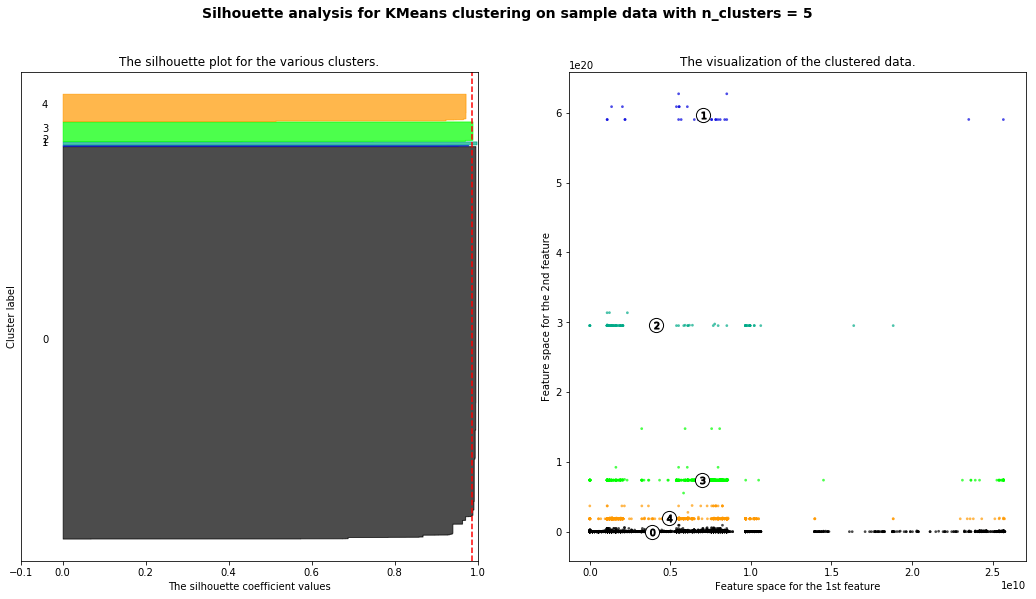

For n_clusters = 6 The average silhouette_score is : 0.987150459835


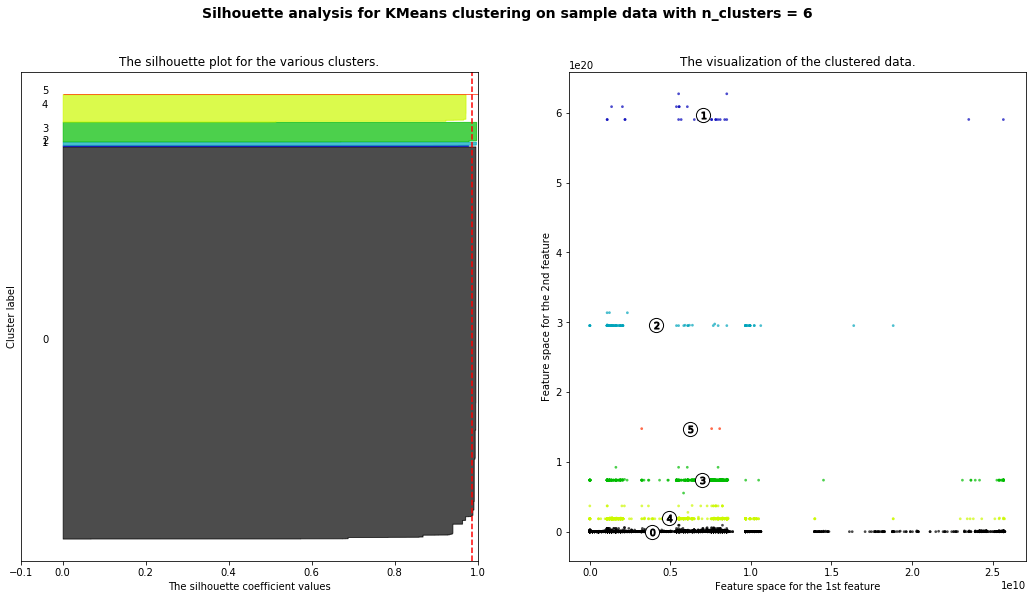

For n_clusters = 7 The average silhouette_score is : 0.988929659874


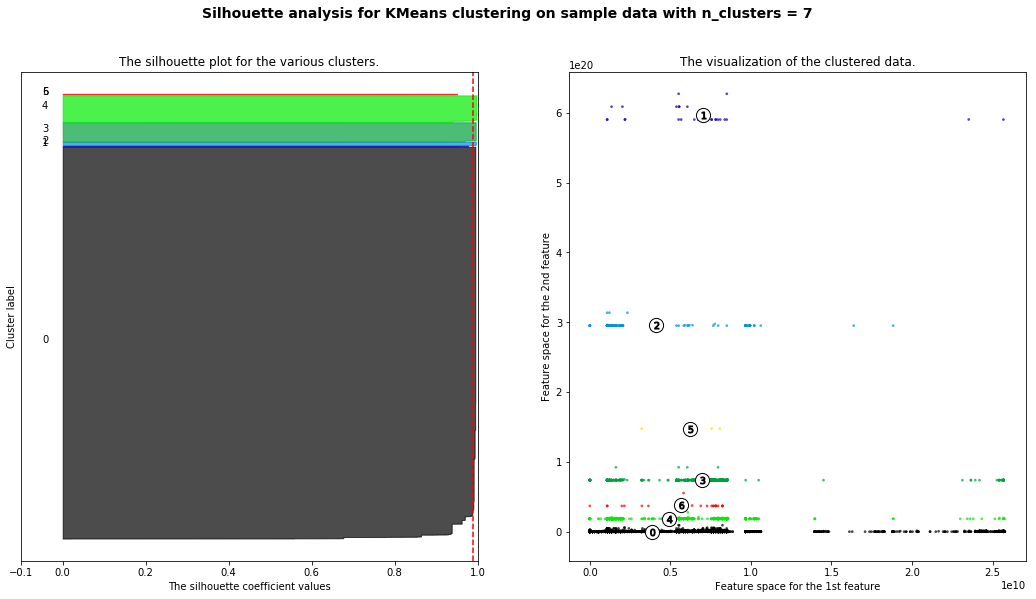

For n_clusters = 8 The average silhouette_score is : 0.988806012727


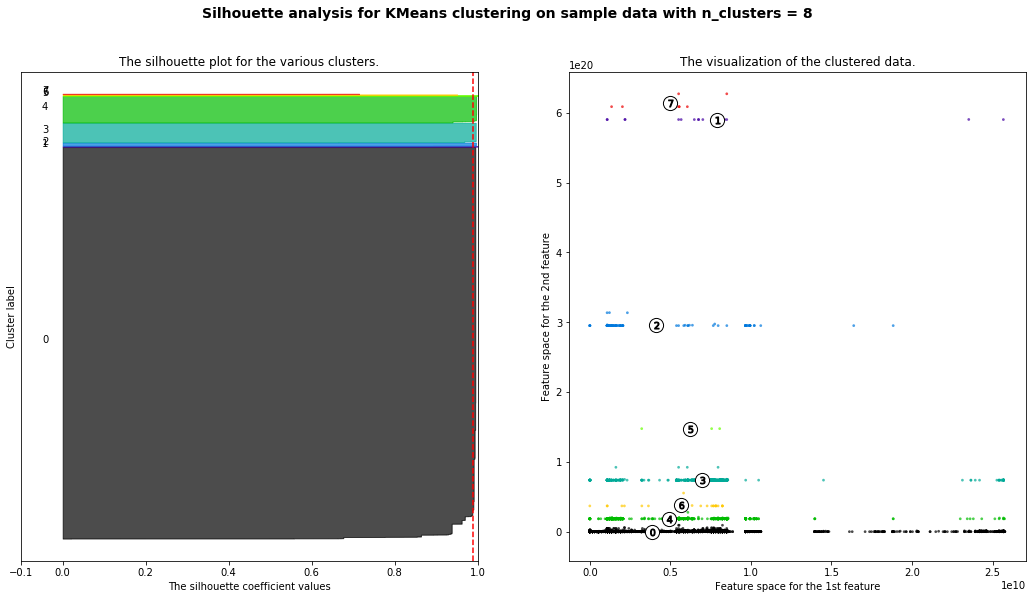

For n_clusters = 9 The average silhouette_score is : 0.988933062972


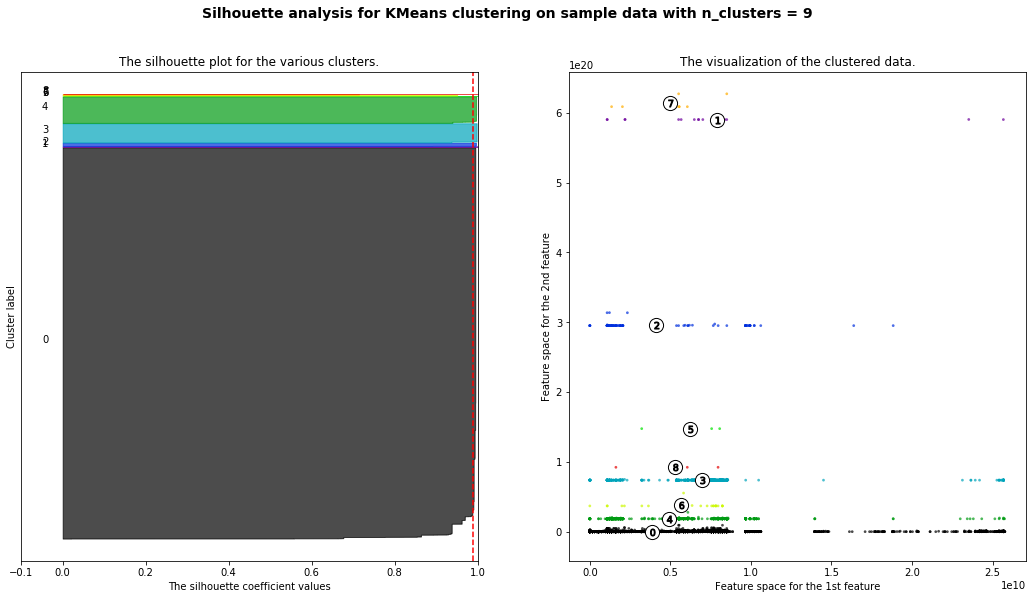

In [54]:
silhoute(sample,[5,6,7,8,9])

In [55]:
hartigan_K(sample)

198

In [56]:
label = kme(sample,9)

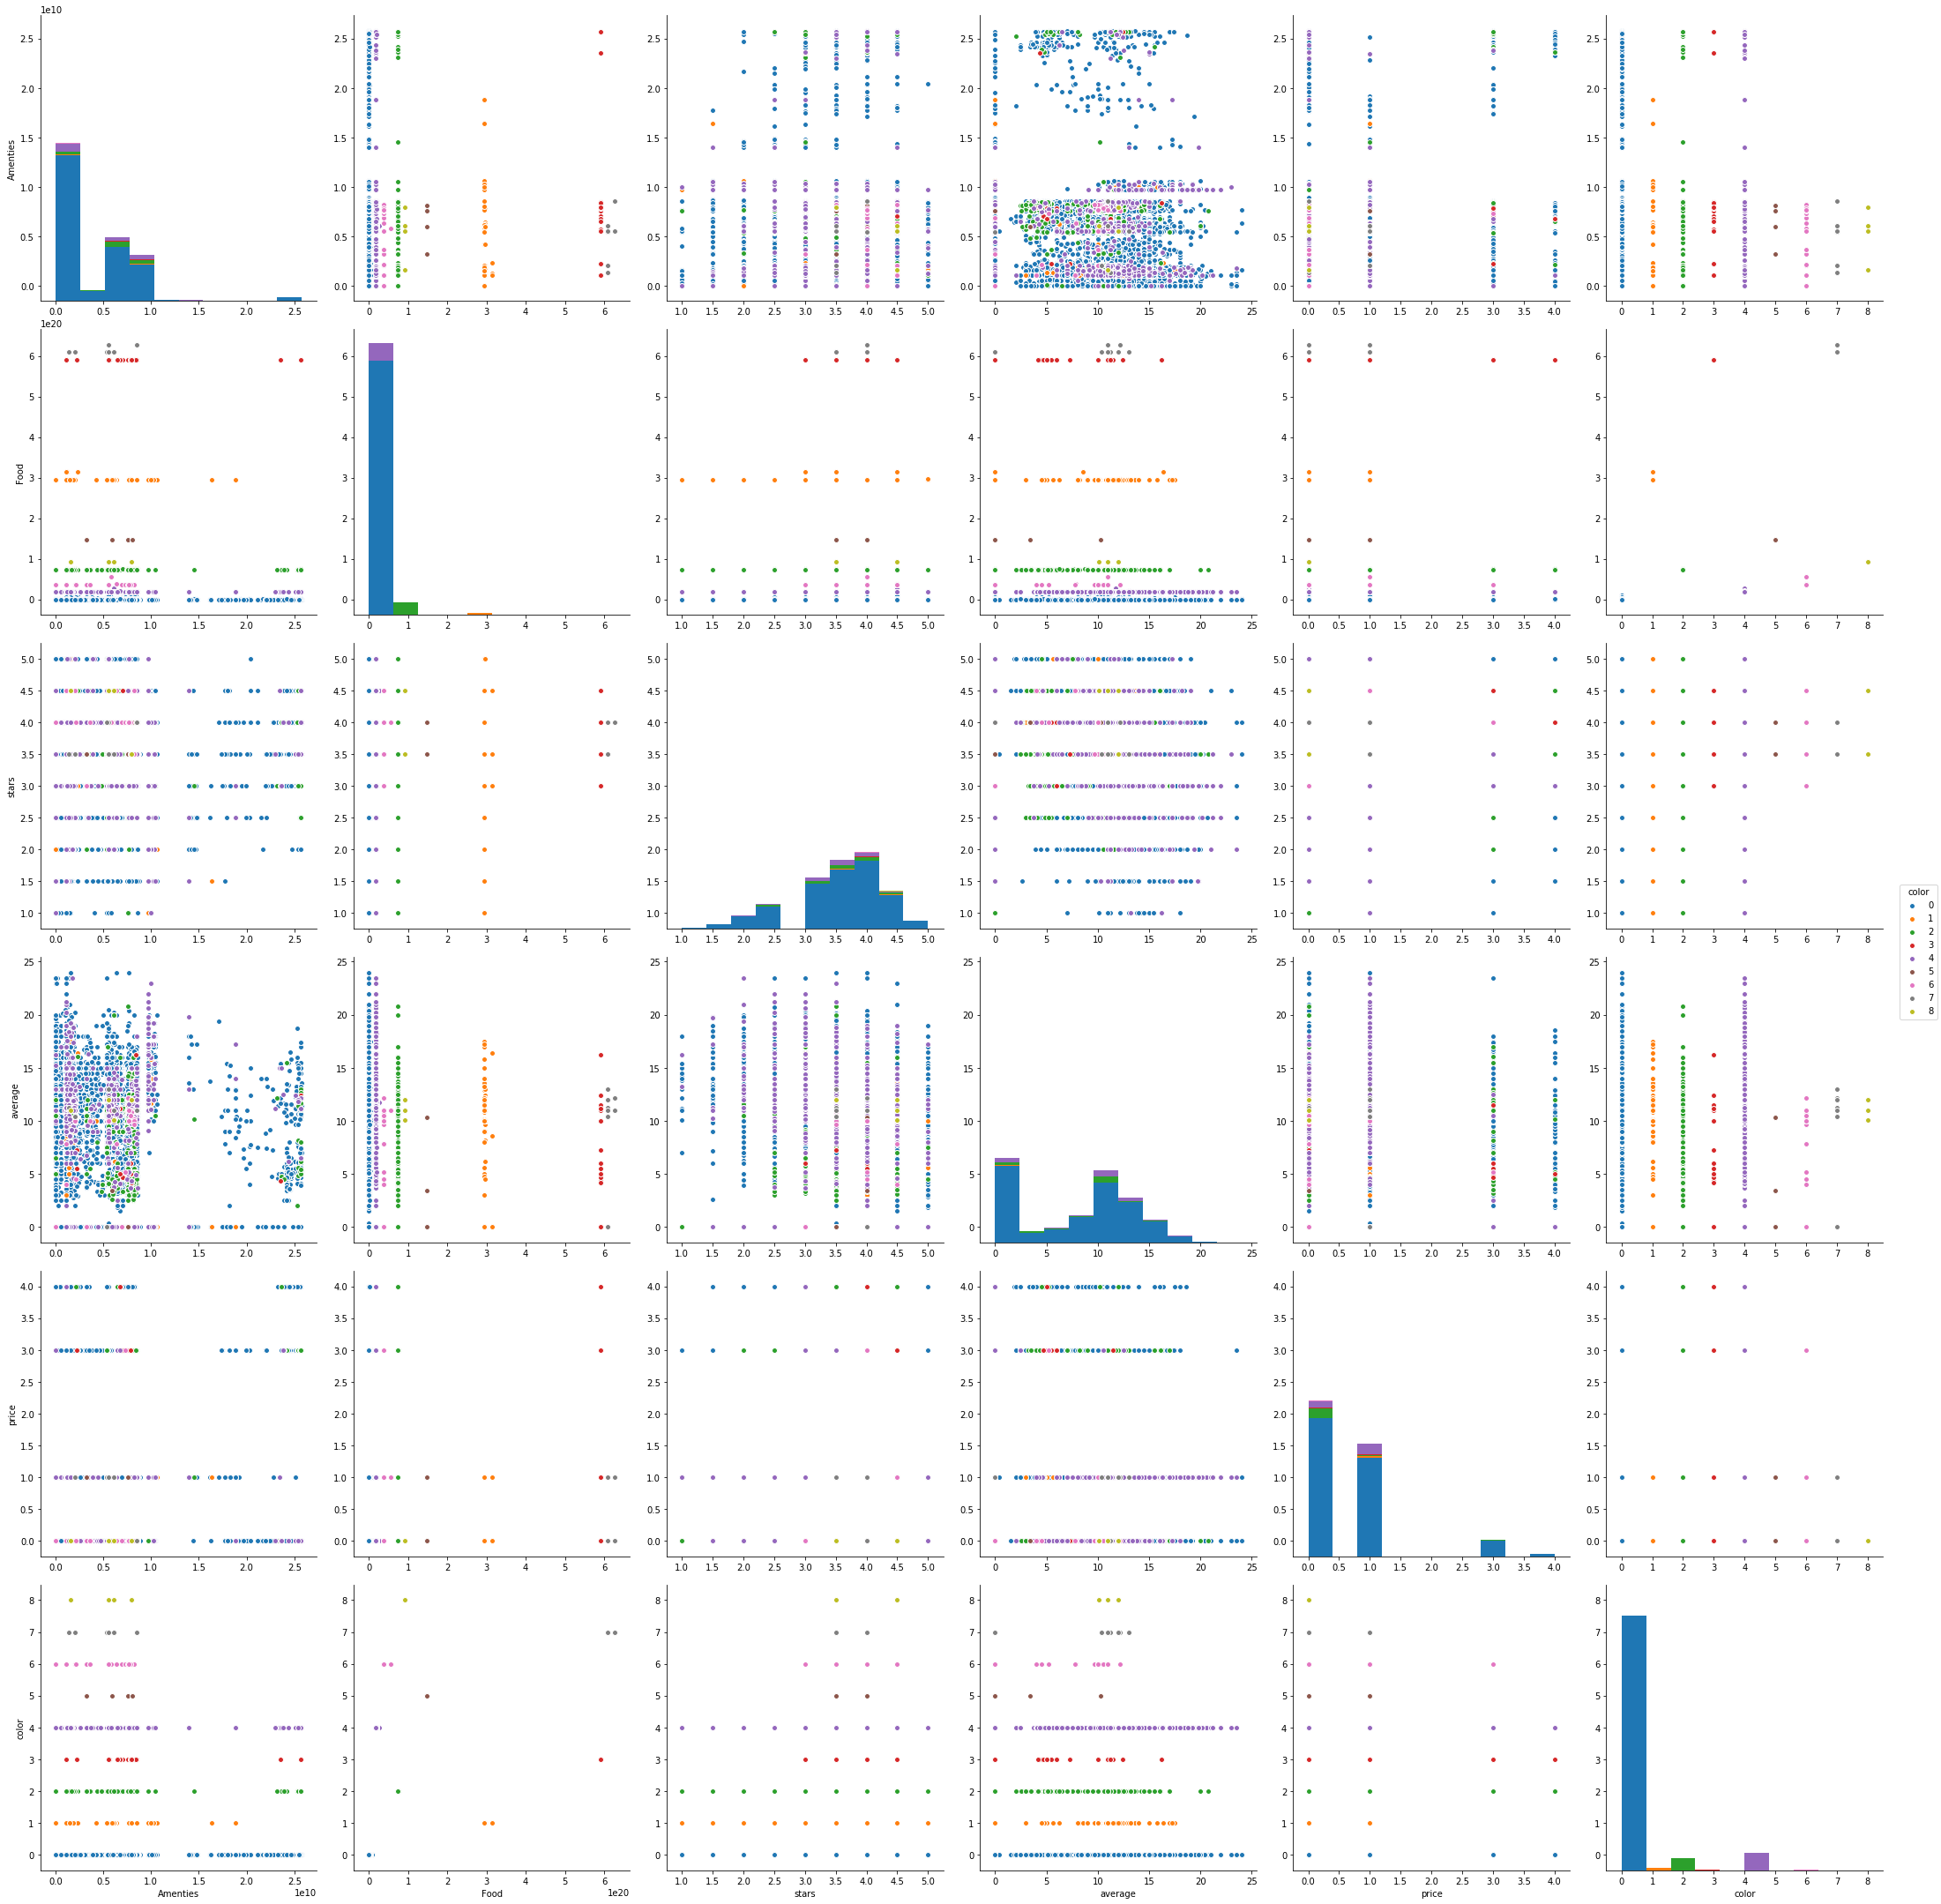

In [57]:
import seaborn as sns
sample["color"] = label
sns.pairplot(sample,hue = "color",size=5)

### I don't  know why I get high socre on this data, maybe you can help me in this Thankyou.